#Importing Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image Preprocessing

In [9]:
training_set= tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition /train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


#Validation Image Preprocessing

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition /validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [37]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [38]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [39]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [40]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#Compiling and Training Phase

In [41]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [42]:
cnn.add(tf.keras.layers.Flatten())

In [43]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [44]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [45]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [46]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

In [48]:
training_history=cnn.fit(x=training_set, validation_data=validation_set, epochs=30)

Epoch 1/30
98/98 [==============================] - 181s 2s/step - loss: 7.4407 - accuracy: 0.0324 - val_loss: 3.5501 - val_accuracy: 0.0513
Epoch 2/30
98/98 [==============================] - 164s 2s/step - loss: 3.7073 - accuracy: 0.0552 - val_loss: 3.4341 - val_accuracy: 0.0741
Epoch 3/30
98/98 [==============================] - 172s 2s/step - loss: 3.6425 - accuracy: 0.0568 - val_loss: 3.3350 - val_accuracy: 0.0798
Epoch 4/30
98/98 [==============================] - 174s 2s/step - loss: 3.3167 - accuracy: 0.0941 - val_loss: 3.1653 - val_accuracy: 0.2051
Epoch 5/30
98/98 [==============================] - 162s 2s/step - loss: 3.0772 - accuracy: 0.1454 - val_loss: 2.8681 - val_accuracy: 0.2251
Epoch 6/30
98/98 [==============================] - 163s 2s/step - loss: 2.8032 - accuracy: 0.2225 - val_loss: 2.0218 - val_accuracy: 0.5185
Epoch 7/30
98/98 [==============================] - 173s 2s/step - loss: 2.4516 - accuracy: 0.2970 - val_loss: 1.8169 - val_accuracy: 0.5470
Epoch 8/30
98

#Evaluating Model

In [49]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 103s 995ms/step - loss: 0.0672 - accuracy: 0.9801
Training accuracy: 0.9800962805747986


In [50]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 15s 397ms/step - loss: 0.7591 - accuracy: 0.9345
Validation accuracy: 0.934472918510437


#Saving Model

In [51]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
#Return Dictionary of history
training_history.history

{'loss': [7.440687656402588,
  3.7073287963867188,
  3.642451763153076,
  3.316709518432617,
  3.077191114425659,
  2.8031651973724365,
  2.4516098499298096,
  2.0854713916778564,
  1.689278483390808,
  1.3982270956039429,
  1.1379613876342773,
  1.0033175945281982,
  0.7812584638595581,
  0.7393384575843811,
  0.6239332556724548,
  0.5460723042488098,
  0.5102478861808777,
  0.48350444436073303,
  0.4420137107372284,
  0.44028061628341675,
  0.4229012131690979,
  0.3825964033603668,
  0.37631678581237793,
  0.36328932642936707,
  0.3516083061695099,
  0.3215653896331787,
  0.25589069724082947,
  0.33371227979660034,
  0.2610490024089813,
  0.28814515471458435],
 'accuracy': [0.03242375701665878,
  0.05521669238805771,
  0.056821830570697784,
  0.0940609946846962,
  0.14542536437511444,
  0.2224719077348709,
  0.29695025086402893,
  0.3967897295951843,
  0.51203852891922,
  0.5948635339736938,
  0.6712680459022522,
  0.7226324081420898,
  0.7714285850524902,
  0.7977527976036072,
  0.8

In [53]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [54]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculating Accuracy of Model Achieved on Validation set

In [55]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 93.4472918510437 %


#Accuracy Visualization

##Training Visualization

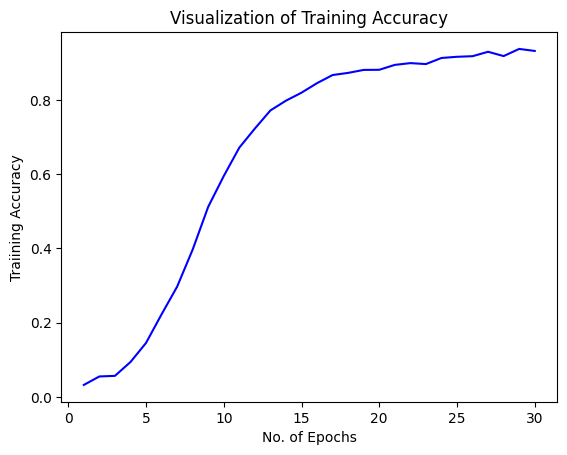

In [57]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy')
plt.show()

##Validation Accuracy

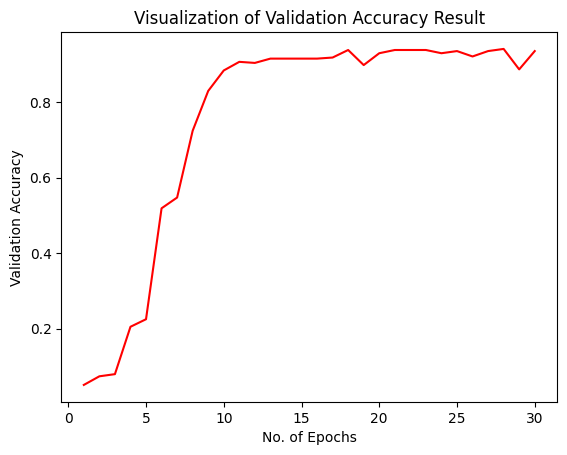

In [58]:
plt.plot(epochs,training_history.history['val_accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [59]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition /test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [61]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 26s 836ms/step - loss: 0.7422 - accuracy: 0.9359
Test accuracy: 0.9359331727027893
